ok, on va faire du crack

In [24]:
import pandas as pd

# Créer un fichier CSV contenant tous les mois multiples de 3 depuis 2000
start_date = "2000-03"
end_date = "2024-12"
date_range = pd.date_range(start=start_date, end=end_date, freq="3MS")
base_df = pd.DataFrame({"Date": date_range.strftime("%Y-%m")})

# Sauvegarder le fichier de base
base_file = "base_dates.csv"
base_df.to_csv(base_file, index=False)

# Noms des fichiers CSV
files = [
    "0_cac40_final.csv",
    "0_bce_final.csv",
    "0_confiance_final.csv",
    "0_ipc_final.csv",
    "0_pib_final.csv",
    "0_chomage_final.csv"
]

# Lire le fichier de base pour initialiser le DataFrame fusionné
merged_df = pd.read_csv(base_file)

# Boucle pour fusionner les fichiers restants
for file in files:
    temp_df = pd.read_csv(file)
    temp_df.rename(columns={temp_df.columns[0]: 'Date'}, inplace=True)
    print(f"Fichier en cours de fusion: {file}, colonnes: {list(temp_df.columns)}")
    # Effectuer la jointure
    merged_df = pd.merge(merged_df, temp_df, on='Date', how='outer', suffixes=('', f'_from_{file.split('_')[1]}'))

# Forcer la conversion des dates pour éviter les erreurs
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce', format="%Y-%m")

# Vérifier et retirer les dates non convertibles (NaT)
merged_df = merged_df.dropna(subset=['Date'])

# Trier par dates pour s'assurer que tout est en ordre chronologique
merged_df.sort_values(by='Date', inplace=True)

# Combiner les colonnes en double si elles existent
for col in merged_df.columns:
    if '_from_' in col:
        base_col = col.split('_from_')[0]
        if base_col in merged_df.columns:
            merged_df[base_col] = merged_df[base_col].combine_first(merged_df[col])
        merged_df.drop(columns=[col], inplace=True)

# Sauvegarder le résultat dans un fichier CSV final
merged_df.to_csv("merged_final.csv", index=False)

print("Fichiers fusionnés avec succès dans 'merged_final.csv'.")

# Vérification finale des colonnes fusionnées
print("Colonnes finales après fusion:", list(merged_df.columns))


Fichier en cours de fusion: 0_cac40_final.csv, colonnes: ['Date', 'cac40']
Fichier en cours de fusion: 0_bce_final.csv, colonnes: ['Date', 'bce']
Fichier en cours de fusion: 0_confiance_final.csv, colonnes: ['Date', 'confiance']
Fichier en cours de fusion: 0_ipc_final.csv, colonnes: ['Date', 'ipc']
Fichier en cours de fusion: 0_pib_final.csv, colonnes: ['Date', 'pib']
Fichier en cours de fusion: 0_chomage_final.csv, colonnes: ['Date', 'chomage ']
Fichiers fusionnés avec succès dans 'merged_final.csv'.
Colonnes finales après fusion: ['Date', 'cac40', 'bce', 'confiance', 'ipc', 'pib', 'chomage ']


In [31]:
import pandas as pd
import statsmodels.api as sm

# Charger les données à partir du fichier CSV
data = pd.read_csv("merged_final.csv")

# Sélectionner les colonnes numériques pour la régression
# Assurez-vous que 'cac40' est la variable dépendante et les autres sont indépendantes
X = data.drop(columns=['Date', 'cac40',])  # Supprimer les colonnes non numériques ou inutiles
y = data['cac40']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire multiple
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  cac40   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.867
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.108
Time:                        21:10:34   Log-Likelihood:                -345.07
No. Observations:                  99   AIC:                             702.1
Df Residuals:                      93   BIC:                             717.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.6954     28.295     -0.943      0.3

In [36]:
import pandas as pd
import statsmodels.api as sm

# Charger les données à partir du fichier CSV
data = pd.read_csv("merged_final.csv")

# Sélectionner les colonnes numériques pour la régression
# Assurez-vous que 'cac40' est la variable dépendante et les autres sont indépendantes
X = data.drop(columns=['Date', 'bce', 'cac40', 'confiance', 'pib'])  # Supprimer les colonnes non numériques ou inutiles
y = data['bce']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire multiple
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    bce   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     26.26
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.89e-16
Time:                        21:25:38   Log-Likelihood:                -161.38
No. Observations:                  99   AIC:                             334.8
Df Residuals:                      93   BIC:                             350.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8650      3.379      8.246      0.0

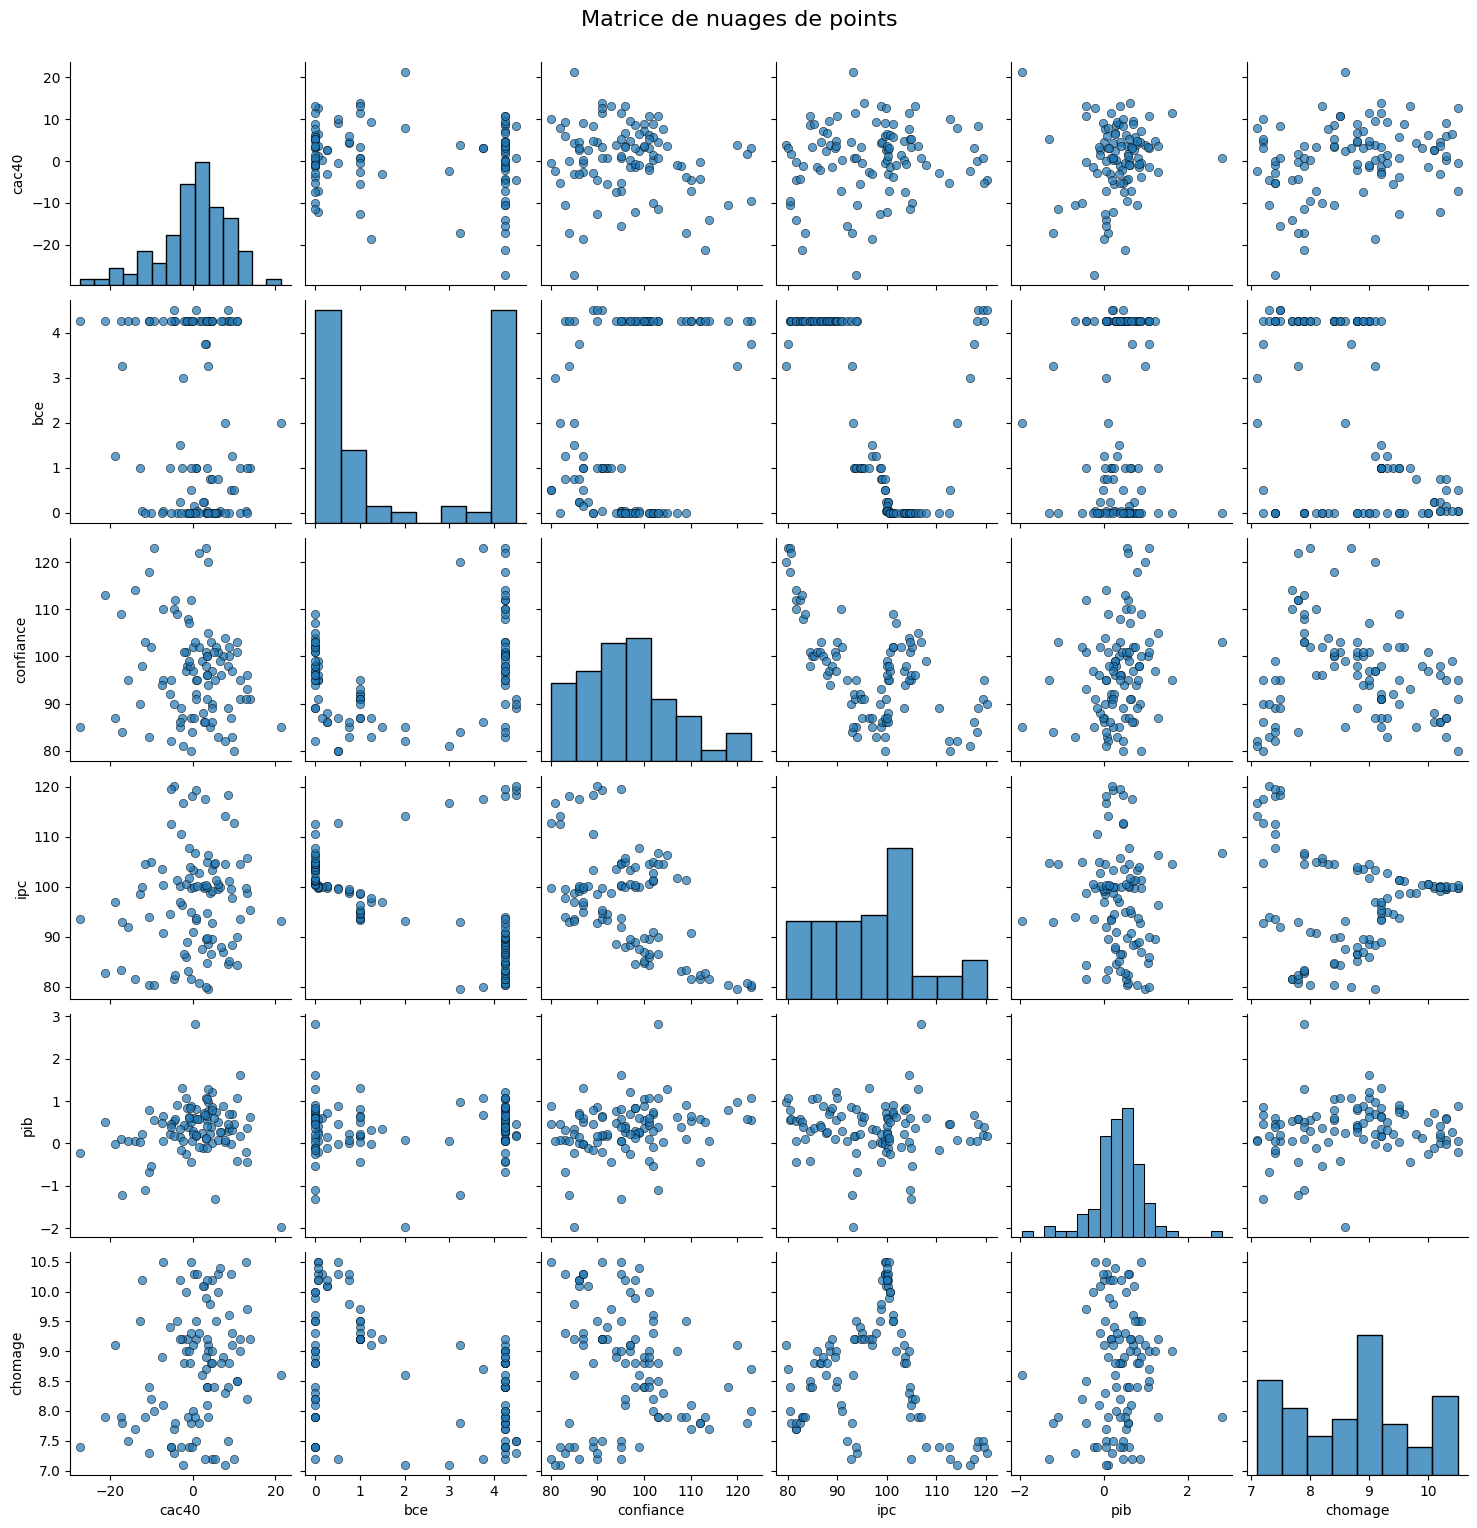

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
    # Charger les données
    data = pd.read_csv('merged_final.csv')

    # Renommer les colonnes pour enlever les espaces inutiles (si nécessaire)
    data.columns = [col.strip() for col in data.columns]

    # Supprimer les colonnes non numériques et la colonne 'Date' pour le traitement
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    if len(numeric_columns) < 2:
        raise ValueError("Le fichier doit contenir au moins deux colonnes numériques pour tracer des nuages de points.")

    # Créer une matrice pairplot avec seaborn
    sns.pairplot(data[numeric_columns], diag_kind="hist", plot_kws={"alpha": 0.7, "edgecolor": "k"})
    plt.suptitle("Matrice de nuages de points", y=1.02, fontsize=16)
    plt.show()

except FileNotFoundError:
    print("Erreur : Le fichier spécifié est introuvable. Veuillez vérifier le chemin et réessayer.")
except pd.errors.EmptyDataError:
    print("Erreur : Le fichier est vide ou invalide.")
except ValueError as e:
    print(f"Erreur : {e}")
except Exception as e:
    print(f"Une erreur inattendue s'est produite : {e}")


In [39]:
import pandas as pd
import statsmodels.api as sm

# Charger les données à partir du fichier CSV
data = pd.read_csv("merged_final.csv")

# Sélectionner la variable indépendante 'bce' et la variable dépendante 'cac40'
X = data[['pib']]  # Sélectionner uniquement la colonne 'bce'
y = data['cac40']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher le résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  cac40   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.329
Date:                Sun, 29 Dec 2024   Prob (F-statistic):              0.252
Time:                        21:30:37   Log-Likelihood:                -349.13
No. Observations:                  99   AIC:                             702.3
Df Residuals:                      97   BIC:                             707.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3645      0.846      0.431      0.6

In [45]:
import pandas as pd
import statsmodels.api as sm

# Charger les données à partir du fichier CSV
data = pd.read_csv("merged_final.csv")

# Sélectionner la variable indépendante 'bce' et la variable dépendante 'cac40'
X = data[['chomage']]  # Sélectionner uniquement la colonne 'bce'
y = data['bce']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher le résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    bce   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     31.88
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.63e-07
Time:                        21:37:37   Log-Likelihood:                -190.89
No. Observations:                  99   AIC:                             385.8
Df Residuals:                      97   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5339      1.513      6.961      0.0

                            OLS Regression Results                            
Dep. Variable:                  cac40   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.231
Date:                Sun, 29 Dec 2024   Prob (F-statistic):             0.0142
Time:                        21:45:34   Log-Likelihood:                -346.72
No. Observations:                  99   AIC:                             697.4
Df Residuals:                      97   BIC:                             702.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6000      7.304     -2.410      0.0

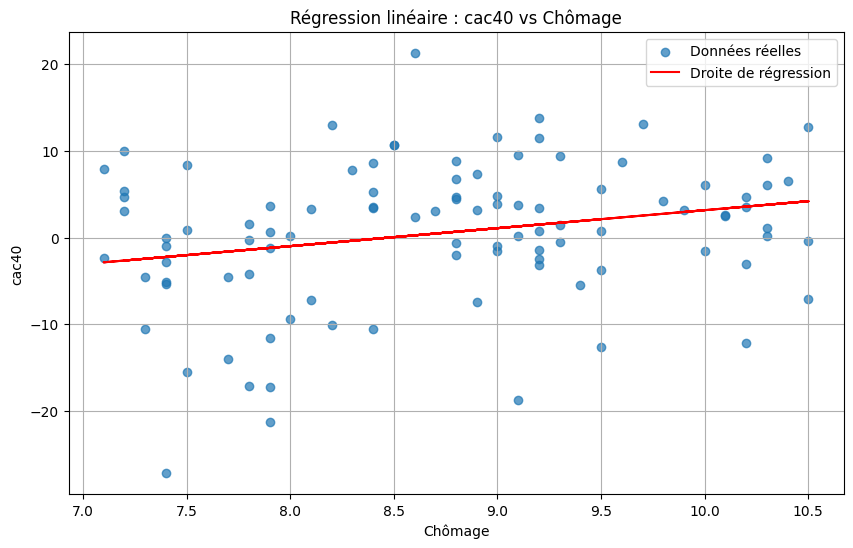

In [49]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV
data = pd.read_csv("merged_final.csv")

# Sélectionner la variable indépendante 'chomage' et la variable dépendante 'bce'
X = data[['chomage']]
y = data['cac40']

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher le résumé des résultats
print(model.summary())

# Tracer la droite de régression sur un graphique
plt.figure(figsize=(10, 6))
plt.scatter(data['chomage'], data['cac40'], label='Données réelles', alpha=0.7)
plt.plot(data['chomage'], model.predict(X), color='red', label='Droite de régression')
plt.title("Régression linéaire : cac40 vs Chômage")
plt.xlabel("Chômage")
plt.ylabel("cac40")
plt.legend()
plt.grid()
plt.show()
